In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

C:\Users\82109\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
diabetes= pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X=diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']

In [4]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
Y=pd.get_dummies(y).values

In [16]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

In [18]:
X_train.shape, X_test.shape

((514, 8), (254, 8))

In [19]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39


In [20]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [22]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(44, activation='relu', input_shape=(8,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 44)                396       
                                                                 
 dense_9 (Dense)             (None, 20)                900       
                                                                 
 dense_10 (Dense)            (None, 16)                336       
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________


In [23]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
17/17 [==============================] - 2s 16ms/step - loss: 4.7295 - accuracy: 0.6051 - val_loss: 1.8691 - val_accuracy: 0.6220
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 1.6662 - accuracy: 0.6595 - val_loss: 1.7121 - val_accuracy: 0.5748
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 1.2397 - accuracy: 0.6381 - val_loss: 1.4978 - val_accuracy: 0.5276
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 1.1482 - accuracy: 0.6537 - val_loss: 0.9664 - val_accuracy: 0.6535
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9211 - accuracy: 0.6245 - val_loss: 0.8607 - val_accuracy: 0.6142
Epoch 6/100
17/17 [==============================] - 0s 10ms/step - loss: 0.7569 - accuracy: 0.6498 - val_loss: 0.7869 - val_accuracy: 0.6457
Epoch 7/100
17/17 [==============================] - 0s 12ms/step - loss: 0.6549 - accuracy: 0.6654 - val_loss: 0.8900 - val_accuracy: 0.5669
Epoch 8/10

Epoch 59/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5184 - accuracy: 0.7490 - val_loss: 0.6224 - val_accuracy: 0.7008
Epoch 60/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.7471 - val_loss: 0.5936 - val_accuracy: 0.7126
Epoch 61/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.7374 - val_loss: 0.6199 - val_accuracy: 0.6890
Epoch 62/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5106 - accuracy: 0.7510 - val_loss: 0.5909 - val_accuracy: 0.7205
Epoch 63/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5196 - accuracy: 0.7276 - val_loss: 0.6300 - val_accuracy: 0.6890
Epoch 64/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5336 - accuracy: 0.7296 - val_loss: 0.6170 - val_accuracy: 0.7126
Epoch 65/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5203 - accuracy: 0.7471 - val_loss: 0.6071 - val_accuracy: 0.6732
Epoch 

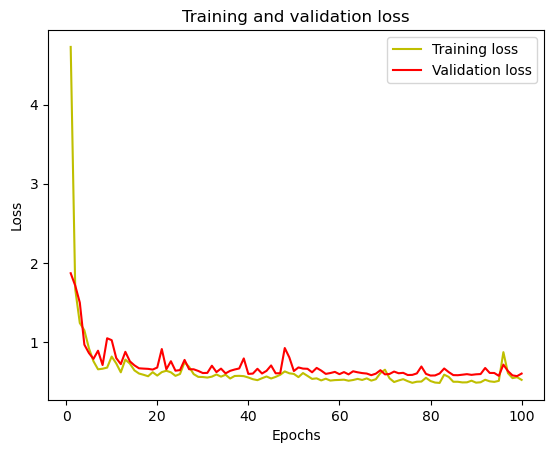

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

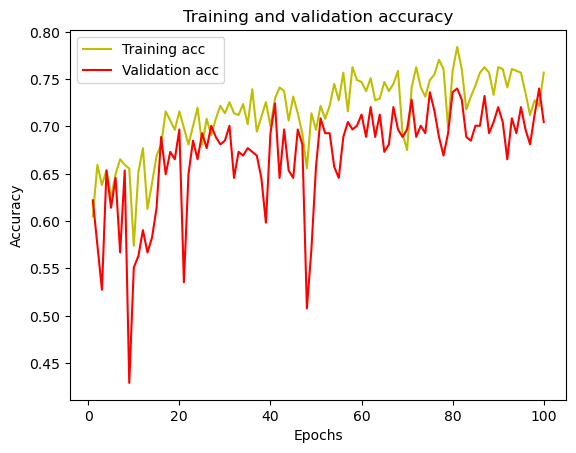

In [25]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       168
           1       0.56      0.62      0.59        86

    accuracy                           0.70       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.71      0.70      0.71       254

[[126  42]
 [ 33  53]]
